An ipython notebook to plot a 2d histogram. Can be used to plot a HR diagram.

Code by ~ Akash Vani

In [1]:
#required libreries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#set font parameters
mpl.rc('font', family='serif', serif=['Dejavu Serif'])
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams["font.family"] = "serif"

pal = sns.color_palette('colorblind')

#import color LogNorm to normalise color gradient
from matplotlib.colors import LogNorm

## Create synthetic data to plot HR diagram

In [2]:
def luminosity (R, Temp):
    sigma = 5.670374419e-8
    '''
    Returns the luminosity for a given Radius R and Temperature
    L = (4πR**2)*σT**4
    sigma is the boltzman constant
    '''
    return (4*np.pi*R**2)*sigma*(Temp)**4

In [3]:
#array to store effective temperature values for different types of stars

#for MS stars
Teff_ms = (np.logspace(np.log10(2500),np.log10(20000),6000))

#for WDs
Teff_wd = (np.logspace(np.log10(4000),np.log10(10000),300))

#for Giants
#inverted the sequnce and added a constant. In order to show the Giant sequence appropriately.
Teff_g = (np.logspace(np.log10(6000),np.log10(10000),400))

In [4]:
#add some gaussian scatter to the effective temperature

#for MS stars
mean = 0
std_dev = 0.6
gaussian_arr_ms = np.random.normal(mean, std_dev, size=Teff_ms.shape)

#for WDs
mean = 0
std_dev = 0.5
gaussian_arr_wd = np.random.normal(mean, std_dev, size=Teff_wd.shape)

#for Giants
mean = 0
std_dev = 0.8
gaussian_arr_g = np.random.normal(mean, std_dev, size=Teff_g.shape)

In [5]:
#Dummy equations to recreate the HR diagram
#to add a shift luminosity axis
vert_shift = 14 

#for MS stars
L_ms = (np.log10(luminosity(1, Teff_ms))**3/np.log10(6000)**3+gaussian_arr_ms)-vert_shift

#for WDs
L_wd = (np.log10(luminosity(0.01, Teff_wd))**3/np.log10(6000)**2.5+gaussian_arr_wd)-vert_shift

#for Giants
L_g = (-10+np.log10(luminosity(10, Teff_g))**3/np.log10(6000)**3+gaussian_arr_g)-vert_shift

In [6]:
#array to store effective temperature values for different types of stars

#for MS stars
Teff_ms = np.log10(Teff_ms)

#for WDs
Teff_wd = np.log10(Teff_wd)

#for Giants
#inverted the sequnce and added a constant. In order to show the Giant sequence appropriately.
Teff_g = -np.log10(Teff_g)+7.5

In [7]:
ms_giants_Teff = np.concatenate((Teff_ms, Teff_g))
ms_giants_L =  np.concatenate((L_ms, L_g))
wd_Teff = Teff_wd
wd_L = L_wd

# create a 2d histogram

<AxesSubplot:xlabel='$log(T_{eff})$', ylabel='${log(L/L_{\\odot})}$'>

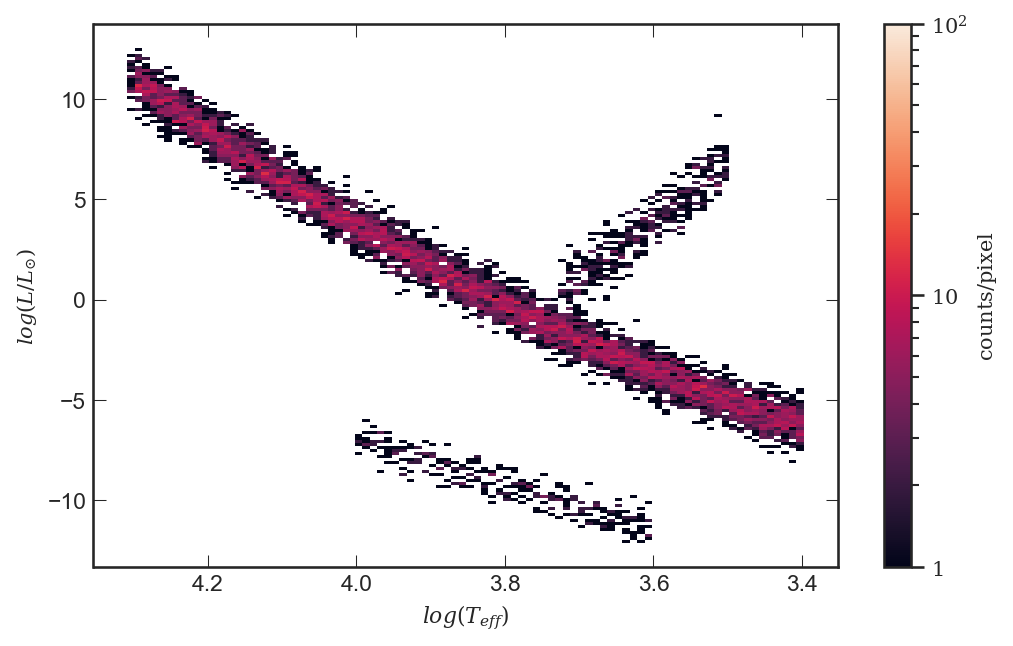

In [8]:
from matplotlib.colors import LogNorm
sns.set_theme(style="ticks")

fontsize=10
ticksize=10
f, ax = plt.subplots(figsize=(8, 4.8), dpi=150)

#axis properties
ax.xaxis.set_tick_params(which='both', direction='in', width=0.5, top='on',)
ax.yaxis.set_tick_params(which='both', direction='in', width=0.5, right='on')

ax.set_ylabel(r'${log(L/L_{\odot})}$', size=fontsize)
ax.set_xlabel(r'$log(T_{eff})$', size=fontsize+0.5)


#plot MS density, spicify bin width accordingly
sns.histplot(x=ms_giants_Teff, y=ms_giants_L, cmap="rocket", binwidth=[0.01,0.15], 
             cbar=False, norm=LogNorm(vmin=1, vmax=100), vmin=None, vmax=None)


ax.invert_xaxis()


#add colorbar for main plot
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([1, 10, 100])
cbar.set_ticklabels(['$1$' ,'$10$', r"$10^2$"],fontsize=ticksize)
#cbar.minorticks_off()
cbar.set_label('$\mathrm{counts/pixel}$', size=fontsize)


#white dwraf sequence separately
sns.histplot(x=wd_Teff, y=wd_L, cmap="rocket", binwidth=[0.01,0.15], 
             cbar=False, norm=LogNorm(vmin=1, vmax=100), vmin=None, vmax=None)

# Can also use plt.hist2d(x,y), it returns counts, ybins, xbins, image. 
# eg: plt.hist2d(ms_giants_Teff,ms_giants_L, norm=LogNorm(), bins=100)

# This is useful as one can plot a plt.contour plot using the returned 'counts'
# eg: plt.contour(counts.transpose(), extent=[ybins[0],ybins[-1],xbins[0],xbins[-1]], levels=10)

# One can also use logarithmically spaced bins and input it to the variable 'bins'

# to add an inset plot, uncomment the lines below
# add inset plot axis
# axins = ax.inset_axes([0.45, 0.63, 0.5, 0.3])
# for axis in ['top','bottom','left','right']:
#    axins.spines[axis].set_linewidth(0.8)
#    axins.spines[axis].set_linewidth(0.8)

# add a new density plot in the inset plot
# sns.histplot(data=df_wise_ms, x='x', y='y', cmap="rocket", binwidth=[0.045,0.25 ],  cbar=False, 
#               norm=LogNorm(vmin=1, vmax=100), vmin=None, vmax=None, ax=axins) 
